# 1. Import Libraries

In [ ]:
from google.colab import drive
import pandas as pd
from sklearn.ensemble import RandomForestClassifier
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import GridSearchCV, cross_val_score
from sklearn.metrics import (accuracy_score, classification_report, confusion_matrix ,precision_score, recall_score, roc_auc_score ,roc_curve, auc, precision_recall_curve)
import matplotlib.pyplot as plt
import numpy as np
import seaborn as sns

# 2. Load Data

In [ ]:
drive.mount('/content/drive')


unmon_features= pd.read_csv('/content/drive/MyDrive/MLproject/unmon_features.csv')
mon_features= pd.read_csv('/content/drive/MyDrive/MLproject/mon_features.csv')
mon_labels = pd.read_csv('/content/drive/MyDrive/MLproject/mon_labels.csv')


Mounted at /content/drive


In [ ]:
mon_features['label'] = mon_labels.values
unmon_features['label'] = -1

combined_data = pd.concat([mon_features, unmon_features], axis=0, ignore_index= True)
combined_data.fillna(0, inplace=True)

X = combined_data.drop('label', axis=1)
y = combined_data['label']


print(X.head)

<bound method NDFrame.head of        total_num  total_sum_dir  total_avg  inpkt_num  inpkt_avg  inpkt_sum  \
0           1421        -603648   4.315749       1300   4.292023    5579.63   
1            518        -183296   4.611815        438   4.673242    2046.88   
2           1358        -574464   5.488969       1240   5.459452    6769.72   
3           1446        -615424   5.995512       1324   5.948693    7876.07   
4           1406        -602112   4.698869       1291   4.663873    6021.06   
...          ...            ...        ...        ...        ...        ...   
28995       4593       -1928704  12.494690       4180  12.360713   51667.78   
28996       5110       -2158592  13.844609       4663  13.729719   64021.68   
28997        361        -124416   3.568144        302   3.251291     981.89   
28998        509        -162304   6.892377        413   6.689346    2762.70   
28999       9990       -4785152   7.916714       9668   7.923616   76605.52   

       inpkt_num_frac

# 3. Preprocess Data


In [ ]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)
print(X_train.shape, X_test.shape)

scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)

(23200, 27) (5800, 27)


# 4. Model selection


In [ ]:
rf_model = RandomForestClassifier()
rf_model.fit(X_train_scaled, y_train)

y_pred = rf_model.predict(X_test_scaled)

print("Accuracy:", accuracy_score(y_test, y_pred))
print("\nConfusion Matrix:\n", confusion_matrix(y_test, y_pred))

Accuracy: 0.715

Confusion Matrix:
 [[1859    1    3 ...    0    0    5]
 [   7   23    0 ...    1    0    0]
 [   9    0   20 ...    0    0    0]
 ...
 [  12    0    0 ...   19    0    0]
 [   4    1    0 ...    0   42    0]
 [   8    0    0 ...    0    0   21]]


# 5. Hyperparameter Tuning

In [ ]:
#하이퍼파라미터 튜닝(GridSearch)
param_grid = {
    # 'n_estimators': [500,1000,1500],
    'n_estimators': [300],
    'max_depth': [10, 20, 30,40,50],
    'max_leaf_nodes':[100,200,300],
    'class_weight': ['balanced']
}

grid_search = GridSearchCV(estimator = rf_model,param_grid = param_grid, cv = 5,scoring='accuracy', n_jobs=-1, verbose=2)
grid_search.fit(X_train_scaled, y_train)


best_params = grid_search.best_params_
best_rf_model = grid_search.best_estimator_



print("Best parameters:", best_params)
print("Best Model:\n", best_rf_model)




Fitting 5 folds for each of 15 candidates, totalling 75 fits
Best parameters: {'class_weight': 'balanced', 'max_depth': 20, 'max_leaf_nodes': 300, 'n_estimators': 300}
Best Model:
 RandomForestClassifier(class_weight='balanced', max_depth=20,
                       max_leaf_nodes=300, n_estimators=300, random_state=42)


In [ ]:

y_pred_best = best_rf_model.predict(X_test_scaled)

accuracy = accuracy_score(y_test, y_pred_best)
print(f"Accuracy with best parameters: {accuracy:.4f}")
print("\nClassification Report:\n", classification_report(y_test, y_pred_best))
cm = confusion_matrix(y_test, y_pred_best)
plt.figure(figsize=(95, 95))
sns.heatmap(cm, annot=True, fmt='d', cmap='Blues', cbar=False)
plt.xlabel('Predicted Labels')
plt.ylabel('True Labels')
plt.title('Confusion Matrix')
plt.show()


Accuracy with best parameters: 0.4024

Classification Report:
               precision    recall  f1-score   support

          -1       0.00      0.00      0.00      1977
           0       0.67      0.29      0.40        35
           1       0.45      0.50      0.47        38
           2       0.47      0.95      0.63        37
           3       0.40      0.75      0.52        36
           4       0.34      0.71      0.46        34
           5       0.77      0.67      0.72        36
           6       0.32      0.91      0.47        35
           7       0.40      0.89      0.56        47
           8       0.67      0.36      0.47        39
           9       0.27      0.53      0.36        32
          10       0.34      0.42      0.38        33
          11       0.69      0.44      0.54        45
          12       0.72      0.79      0.76        43
          13       0.75      0.07      0.14        40
          14       0.45      0.30      0.36        44
          15      

/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1531: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1531: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1531: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))


In [ ]:


precision = precision_score(y_test, y_pred_best, average='macro')
recall = recall_score(y_test, y_pred_best, average='macro')        # 'macro'로 설정

fpr_best, tpr_best, _ = roc_curve(y_test, y_pred_best, pos_label=1)
roc_auc_best = auc(fpr_best, tpr_best)

precision_values_best, recall_values_best, _ = precision_recall_curve(y_test, y_pred_best, pos_label=1)
pr_auc_best = auc(recall_values_best, precision_values_best)

# Display results
print(f"Tuned Model Accuracy: {accuracy:.4f}")
print(f"Tuned Model Precision: {precision:.4f}")
print(f"Tuned Model Recall: {recall:.4f}")
print(f"Tuned Model ROC AUC: {roc_auc_best:.4f}")
print(f"Tuned Model PR AUC: {pr_auc_best:.4f}")
print(f"Model Confusion Matrix:")
plt.figure(figsize=(95, 95))
sns.heatmap(cm, annot=True, fmt='d', cmap='Blues', cbar=False)
plt.xlabel('Predicted Labels')
plt.ylabel('True Labels')
plt.title('Confusion Matrix')
plt.show()


/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1531: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))


Tuned Model Accuracy: 0.4024
Tuned Model Precision: 0.4396
Tuned Model Recall: 0.6063
Tuned Model ROC AUC: 0.2028
Tuned Model PR AUC: 0.0169
Model Confusion Matrix:


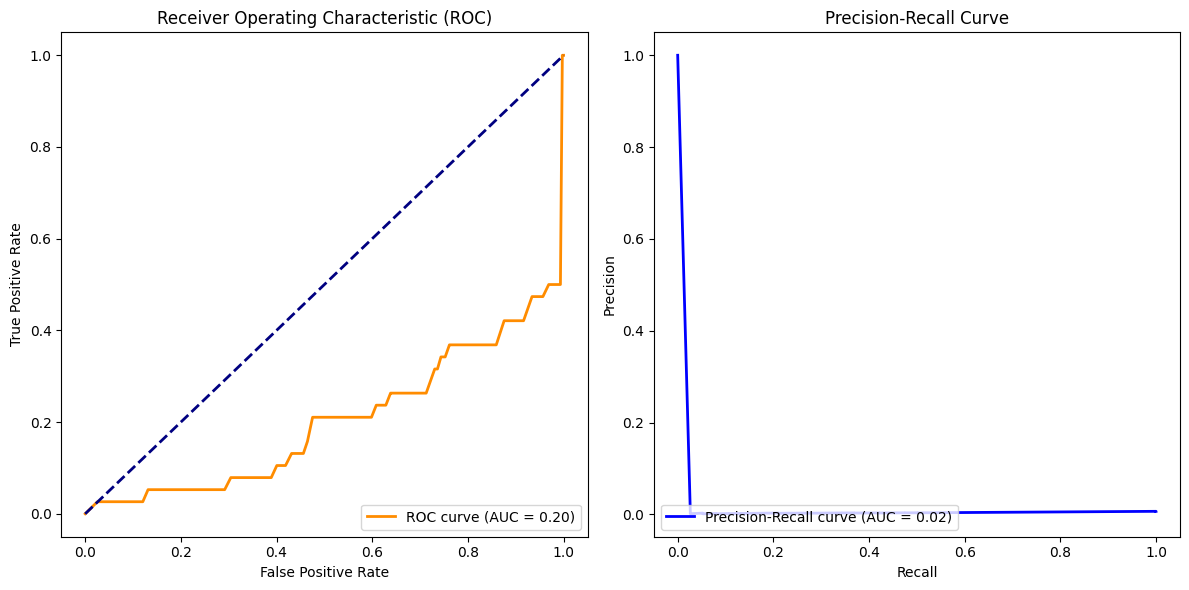

In [ ]:
# Plot ROC and Precision-Recall Curves
plt.figure(figsize=(12, 6))

# ROC Curve
plt.subplot(1, 2, 1)
plt.plot(fpr_best, tpr_best, color='darkorange', lw=2, label=f'ROC curve (AUC = {roc_auc_best:.2f})')
plt.plot([0, 1], [0, 1], color='navy', lw=2, linestyle='--')  # Diagonal reference line
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Receiver Operating Characteristic (ROC)')
plt.legend(loc="lower right")

# Precision-Recall Curve
plt.subplot(1, 2, 2)
plt.plot(recall_values_best, precision_values_best, color='blue', lw=2, label=f'Precision-Recall curve (AUC = {pr_auc_best:.2f})')
plt.xlabel('Recall')
plt.ylabel('Precision')
plt.title('Precision-Recall Curve')
plt.legend(loc="lower left")

# Adjust layout for better spacing
plt.tight_layout()
plt.show()